In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
email=pd.read_csv('email_table.csv.txt')

In [4]:
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


### 1.What percentage of users opened the email and what percentage clicked on the link within the email?

In [5]:
email_opened=pd.read_csv("email_opened_table.csv.txt")
link_clicked=pd.read_csv("link_clicked_table.csv.txt")

In [14]:
#Number of users who received the emails
users_received= email['email_id'].nunique()
perc_users_opened= (email_opened['email_id'].nunique()/users_received)*100
perc_users_clicked_link= (link_clicked['email_id'].nunique()/users_received)*100

In [16]:
print('{0:25s} {1:>8.4f}%'.format('Opened user percentage:',perc_users_opened))
print('{0:25s} {1:>8.4f}%'.format('Clicked user percentage:',perc_users_clicked_link))

Opened user percentage:    10.3450%
Clicked user percentage:    2.1190%


Combine the datasets

In [17]:
# create new columns `opened` and `clicked`
email_opened['opened'] = 1
link_clicked['clicked'] = 1
data = pd.merge(left=email, right=email_opened, how='left', on='email_id')
data = pd.merge(left=data, right=link_clicked, how='left', on='email_id')
data = data.fillna(value=0)
data['opened'] = data['opened'].astype(int)
data['clicked'] = data['clicked'].astype(int)
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


### 2. Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.

In [32]:
def visualize(col_name):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.countplot(x=col_name,data=data,ax=ax[0])
    ax[0].set_xlabel(col_name, fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Count Plot of'+ '' + col_name, fontsize=16)

    sns.barplot(x=col_name,y='clicked',data=data,ax=ax[1])
    ax[1].set_xlabel(col_name, fontsize=12)
    ax[1].set_ylabel('Click Through Rate', fontsize=12)
    ax[1].set_title('Click Through Rate vs.' + '' +col_name, fontsize=16)
    plt.tight_layout()
    plt.show()

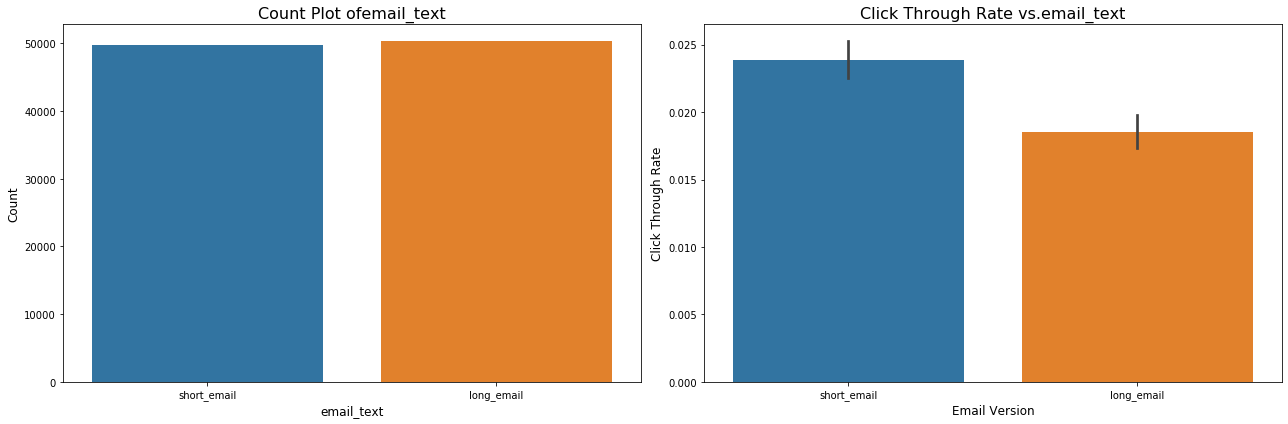

In [29]:
visualize('email_text')

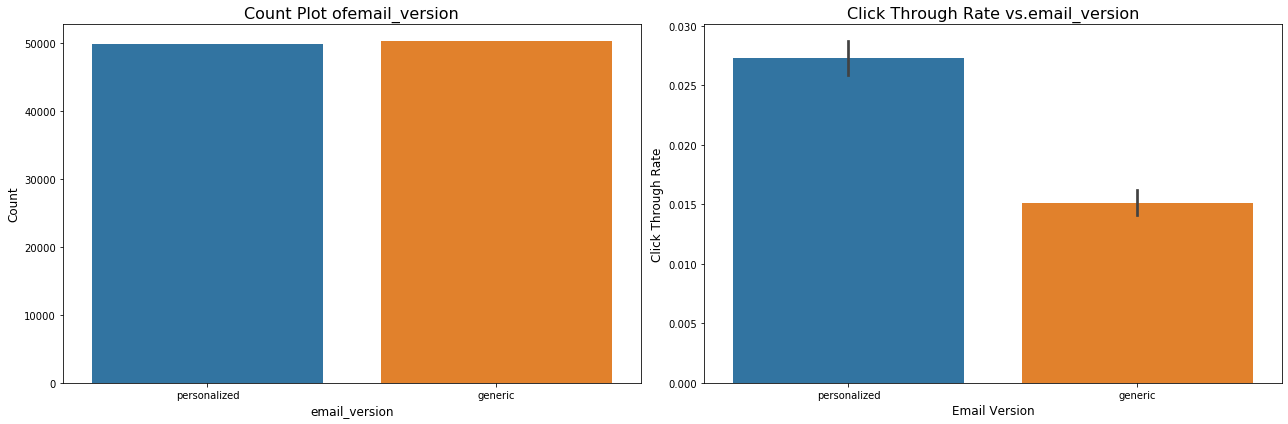

In [28]:
visualize('email_version')


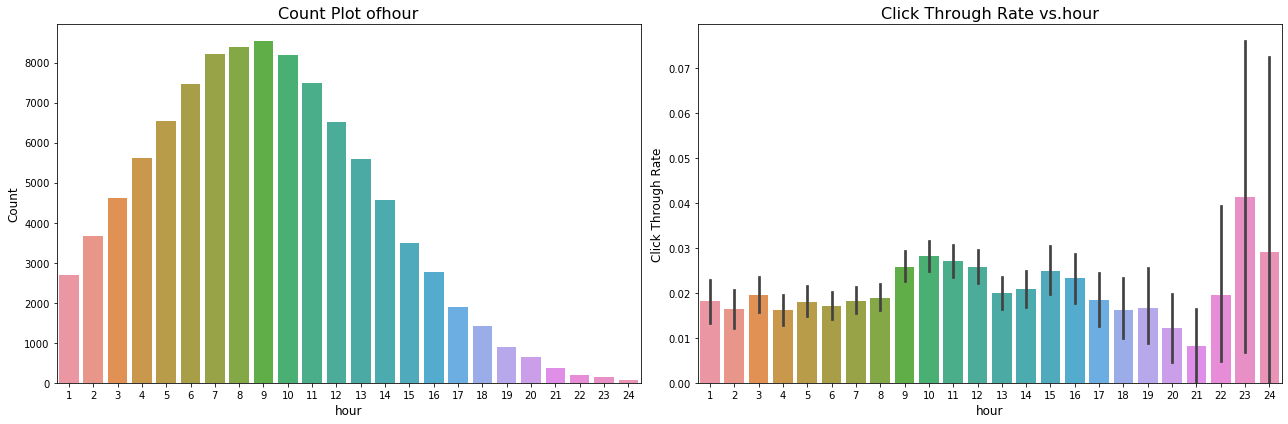

In [120]:
visualize('hour')

The click rate during late hours is higher but this could be because the number of emails sent then is lower when compared to rest of the hours.

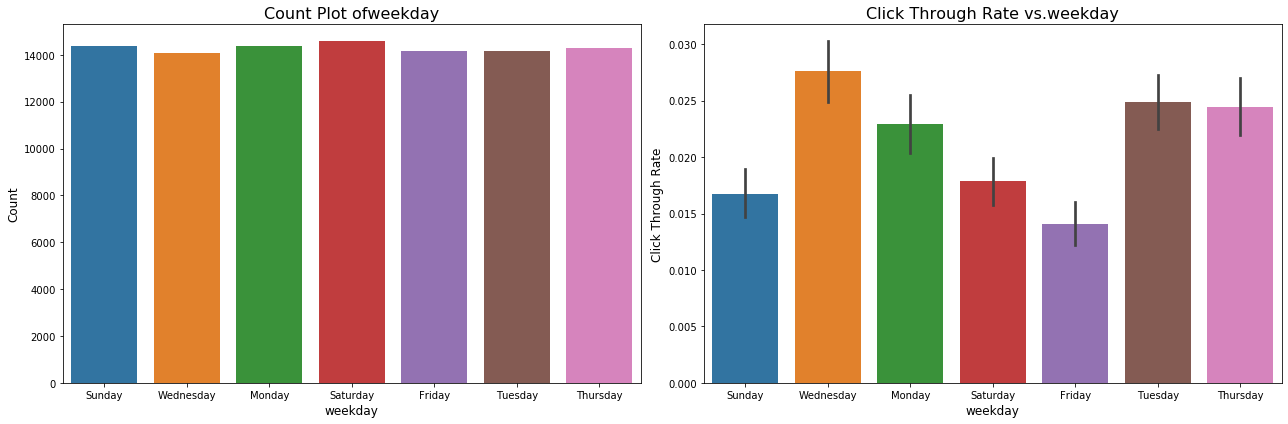

In [121]:
visualize('weekday')

Highest click rate is observed for Wednesday, Tuesday and Thursday indicating that people do not prefer reading emails on weekends.

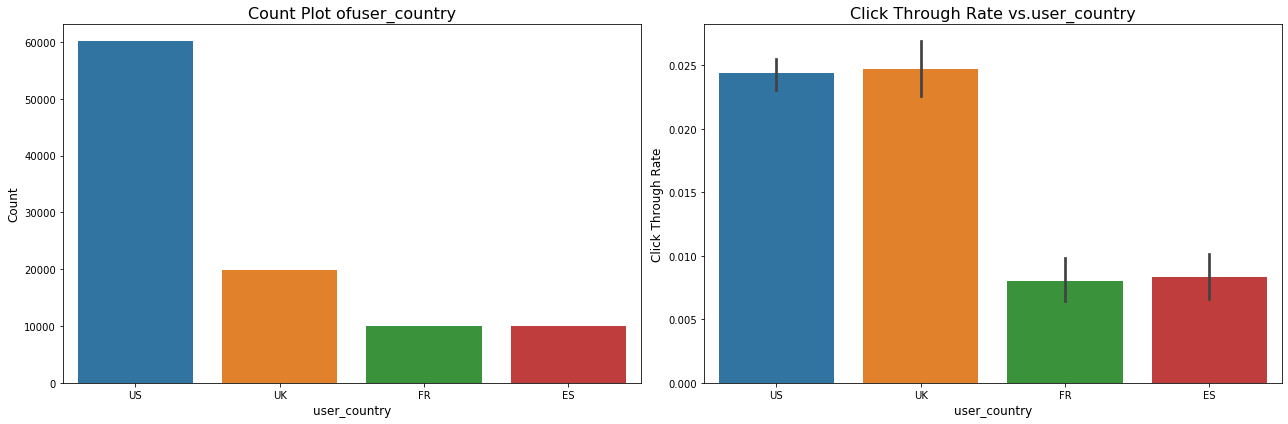

In [33]:
visualize('user_country')

US and UK have the highest click rate for emails. This could be due to language barriers and difficulty of translation of english emails to local languages in countries like France and Spain.

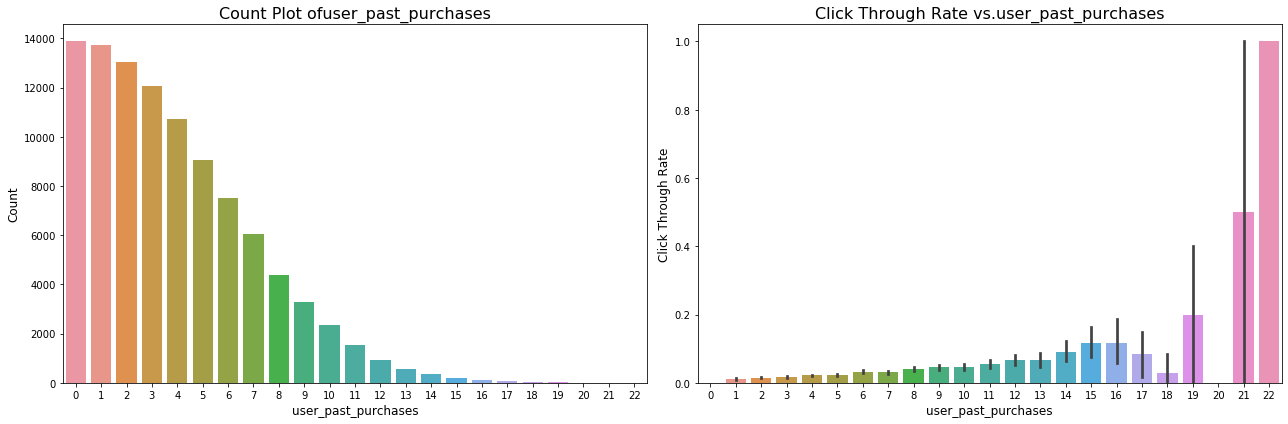

In [34]:
visualize('user_past_purchases')

We can see that there is a clear relationship between products previously purchased and the click rate. It can be seen that more the number of products purchased previously, it's more likely for the user to click on the links in emails. 
However, we can also see that more number of emails were sent out to users that bought fewer products.

### Build predictive Model

Building a classification model would help in this case as it can correctly identify which users are more likely to click on the links in the email and hence help us optimize the process of sending emails.

In [38]:
#Preparing data for the model

# Perform one hot encoding as there are some categorical features
df= pd.get_dummies(data,prefix_sep='_',drop_first=True)
df.head()


,email_id,hour,user_past_purchases,opened,clicked,email_text_short_email,email_version_personalized,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,2,5,0,0,1,1,0,0,1,0,0,0,0,0,1
1,966622,12,2,1,1,0,1,0,0,1,0,0,0,0,1,0
2,777221,11,2,0,0,0,1,0,0,0,0,0,1,0,0,1
3,493711,6,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,106887,14,6,0,0,0,0,1,0,0,0,0,0,0,0,1


In [39]:
df['clicked'].value_counts()

0    97881
1     2119
Name: clicked, dtype: int64

In [50]:
df.drop(['email_id'],axis=1)

,hour,user_past_purchases,opened,clicked,email_text_short_email,email_version_personalized,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,2,5,0,0,1,1,0,0,1,0,0,0,0,0,1
1,12,2,1,1,0,1,0,0,1,0,0,0,0,1,0
2,11,2,0,0,0,1,0,0,0,0,0,1,0,0,1
3,6,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,14,6,0,0,0,0,1,0,0,0,0,0,0,0,1
5,6,3,0,0,0,1,0,0,1,0,0,0,0,1,0
6,9,8,1,0,1,1,0,1,0,0,0,0,0,0,1
7,8,2,0,0,0,0,0,1,0,0,0,0,0,0,1
8,5,4,0,0,0,1,1,0,0,0,0,0,0,0,1
9,23,3,0,0,1,1,0,0,0,0,0,1,0,0,1


In [92]:
#Splitting dataset into train and test datasets
X= df.loc[:,df.columns!='clicked'].values
Y=df['clicked'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [103]:
#SMOTE: synthetically creating data points to balance classes

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import numpy as np
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)


Using TensorFlow backend.


In [54]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [64]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Hyper parameter Tuning

In [108]:
p_test3 = {'learning_rate':[0.15,0.1,0.05], 'n_estimators':[50,60,100,250]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_res,y_train_res)
tuning.best_params_, tuning.best_score_

C:\Users\sarva\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'learning_rate': 0.15, 'n_estimators': 250}, 0.9932449546196445)

In [111]:
model_GB = GradientBoostingClassifier(n_estimators=250,learning_rate=0.15,min_samples_split=500,min_samples_leaf=50,max_depth=4,max_features='sqrt',subsample=0.8,random_state=0)
model_GB.fit(x_train_res, y_train_res)
y_pred = model_GB.predict(X_test)

In [112]:
#printing the classification report

from sklearn.metrics import classification_report
target_names=['0','1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     19588
           1       0.20      0.52      0.29       412

    accuracy                           0.95     20000
   macro avg       0.59      0.74      0.63     20000
weighted avg       0.97      0.95      0.96     20000



In [117]:
#AUC_ROC score

print( (roc_auc_score(y_test, y_pred) ))

0.7366450333174066


In [118]:
from sklearn.metrics import precision_score,recall_score
print ("test precision: {:.2f}%".format(precision_score(y_test,y_pred) * 100))
print ("test recall: {:.2f}%".format(recall_score(y_test,y_pred) * 100))

test precision: 19.93%
test recall: 51.70%


In [119]:
n_emails_old_sent = y_pred.shape[0]
n_emails_new_sent = y_pred.sum()
saving_percentage = 100 - n_emails_new_sent * 100.0/n_emails_old_sent
pd.Series({'#emails sent in old way': n_emails_old_sent,
           '#emails sent in new way': n_emails_new_sent,
           'saving percentage (%)': saving_percentage})

#emails sent in old way    20000.000
#emails sent in new way     1069.000
saving percentage (%)         94.655
dtype: float64

### The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?
By how much do you think your model would improve click through rate ( deﬁned as # of users who click on the link / total users who received the email). How would you test that?

I have built a Gradient Boosting Classifier which predicts whether a user will click the link or not. The new email campaign strategy could be to only send emails to people that are idenftified as 'positive' by the model.
